# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [20]:
from google.colab import files
uploaded = files.upload()

Saving fuel_econ.csv to fuel_econ.csv


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:


# Load the data
fuel_data = np.genfromtxt('fuel_econ.csv', delimiter=',', skip_header=1)

# Check for NaNs or Infs in the original data
if np.isnan(fuel_data).any() or np.isinf(fuel_data).any():
    print("Original data contains NaNs or Infs.")
else:
    print("Original data is clean.")

print("Total missing values before imputation:", np.isnan(fuel_data).sum())

# Identify columns that are completely NaN
valid_columns = ~np.all(np.isnan(fuel_data), axis=0)
print("Valid columns (True means column has some valid data):", valid_columns)

# Remove columns that are completely NaN
fuel_data_clean = fuel_data[:, valid_columns]
print("Cleaned data shape after removing empty columns:", fuel_data_clean.shape)

# Impute missing values by replacing NaNs with the column mean
col_means = np.nanmean(fuel_data_clean, axis=0)
inds = np.where(np.isnan(fuel_data_clean))
fuel_data_clean[inds] = np.take(col_means, inds[1])

# Verify that the data is now clean
if np.isnan(fuel_data_clean).any() or np.isinf(fuel_data_clean).any():
    print("Data still contains NaNs or Infs after imputation.")
else:
    print("Missing values have been imputed; data is now clean.")

# Standardize the data (Z-score normalization)
mean = np.mean(fuel_data_clean, axis=0)
std_dev = np.std(fuel_data_clean, axis=0)
standardized_data = (fuel_data_clean - mean) / std_dev
print("Standardized Data Sample:\n", standardized_data[:5])



 # Display the first few rows of standardized datatd_dev = np.std(fuel_data
  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation


Original data contains NaNs or Infs.
Total missing values before imputation: 23486
Valid columns (True means column has some valid data): [ True False  True  True False False False False  True  True  True  True
  True  True  True  True  True  True  True  True]
Cleaned data shape after removing empty columns: (3929, 15)
Missing values have been imputed; data is now clean.
Standardized Data Sample:
 [[-1.73714048  0.         -1.47583548  0.28310163  0.65053594  1.46709627
  -1.21737766 -0.85996012 -0.85242986 -1.29062982 -1.39247459 -1.00832279
   1.02283829 -0.95057953 -0.94575548]
 [-1.73668367  0.         -1.47583548 -0.78181585 -0.72799833  1.86476224
  -1.21737766  0.00642675 -0.11743408  0.18494654 -0.03920038  0.07186379
  -0.29854998  0.1886082   0.1942578 ]
 [-1.73622685  0.         -1.47583548  0.28310163  0.49736547  1.86476224
  -1.21737766 -0.69441634 -0.75324472 -0.5920197  -0.85174957 -0.68633929
   0.56793413 -0.38098566 -0.37574884]
 [-1.73577004  0.         -1.47583548 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [37]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)
print("Covariance Matrix:\n", cov_matrix)
 # Calculate covariance matrix


Covariance Matrix:
 [[ 1.00025458  0.00196682  0.98591866 -0.06011148 -0.07468488 -0.00657025
  -0.02195656  0.09182316  0.09124849  0.0906161   0.09538375  0.09382686
  -0.09974229 -0.1279056  -0.12235207]
 [ 0.00196682  1.00025458 -0.00460566  0.01972883 -0.00392435 -0.00888096
  -0.04956249 -0.00608761 -0.00629619 -0.01807597 -0.0181764  -0.01075999
   0.00977688 -0.00594106 -0.00594537]
 [ 0.98591866 -0.00460566  1.00025458 -0.05532701 -0.07044161  0.00623397
  -0.03365174  0.06806739  0.06675938  0.07330836  0.07766039  0.07201181
  -0.0811853  -0.1498676  -0.14517775]
 [-0.06011148  0.01972883 -0.05532701  1.00025458  0.93411019  0.24763384
  -0.00426546 -0.69327904 -0.66619842 -0.76646982 -0.77169964 -0.73821112
   0.84848979 -0.78405759 -0.78201448]
 [-0.07468488 -0.00392435 -0.07044161  0.93411019  1.00025458  0.2594021
   0.02207729 -0.71366074 -0.6863403  -0.78418374 -0.78865771 -0.75859024
   0.85559254 -0.7936343  -0.79141752]
 [-0.00657025 -0.00888096  0.00623397  0.24763

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [38]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)
 # Perform eigendecomposition


Eigenvalues:
 [8.95732900e+00 2.06778038e+00 1.59494985e+00 1.00194965e+00
 6.70557348e-01 2.98937017e-01 1.60951709e-01 1.25503044e-01
 6.38156096e-02 3.23497255e-02 1.36732332e-02 9.24625749e-03
 4.24529590e-03 2.14355387e-03 3.87052395e-04]
Eigenvectors:
 [[ 1.89941195e-02 -6.87672844e-01  7.63944753e-02 -6.94956993e-03
   1.84471294e-02 -1.55370697e-02  6.98290832e-02  1.14700572e-01
   4.89076862e-03 -1.14831542e-01 -6.95588923e-01 -6.84212848e-02
   2.14431336e-02 -7.15778098e-03  4.31383588e-04]
 [-3.87968261e-03 -8.78560064e-04 -4.69031125e-02 -9.96700865e-01
   9.51988977e-03 -6.24277260e-02 -8.91554202e-03 -7.40466334e-03
   1.48655822e-02  1.82257716e-03  4.85855299e-03  1.18213229e-04
  -1.04928719e-03  1.68552117e-04  6.62677806e-04]
 [ 1.24712410e-02 -6.89498247e-01  6.89182398e-02  3.63883448e-04
  -9.46913128e-03 -1.32210830e-02  3.37982027e-02  8.55377872e-02
  -8.59196904e-03 -5.52271239e-02  7.10352110e-01  5.59250142e-02
  -9.85072483e-03 -2.77951656e-04 -3.81939135

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [39]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices sorted in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted Eigenvalues:\n", sorted_eigenvalues)

Sorted Eigenvalues:
 [8.95732900e+00 2.06778038e+00 1.59494985e+00 1.00194965e+00
 6.70557348e-01 2.98937017e-01 1.60951709e-01 1.25503044e-01
 6.38156096e-02 3.23497255e-02 1.36732332e-02 9.24625749e-03
 4.24529590e-03 2.14355387e-03 3.87052395e-04]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [42]:
# Step 6: Project Data onto Principal Components
# Step 6: Project Data onto Principal Components
num_components = 2  # Select the number of principal components
projection_matrix = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, projection_matrix)
print("Reduced Data Shape:", reduced_data.shape)
print("Reduced Data Sample:\n", reduced_data[:5])


Reduced Data Shape: (3929, 2)
Reduced Data Sample:
 [[-3.19146285  1.98761148]
 [ 0.38750146  1.99182919]
 [-2.09149129  2.03733761]
 [-2.37914613  2.06370559]
 [ 2.59726417  2.50422333]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [43]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 2)


array([[-3.19146285,  1.98761148],
       [ 0.38750146,  1.99182919],
       [-2.09149129,  2.03733761],
       [-2.37914613,  2.06370559],
       [ 2.59726417,  2.50422333]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

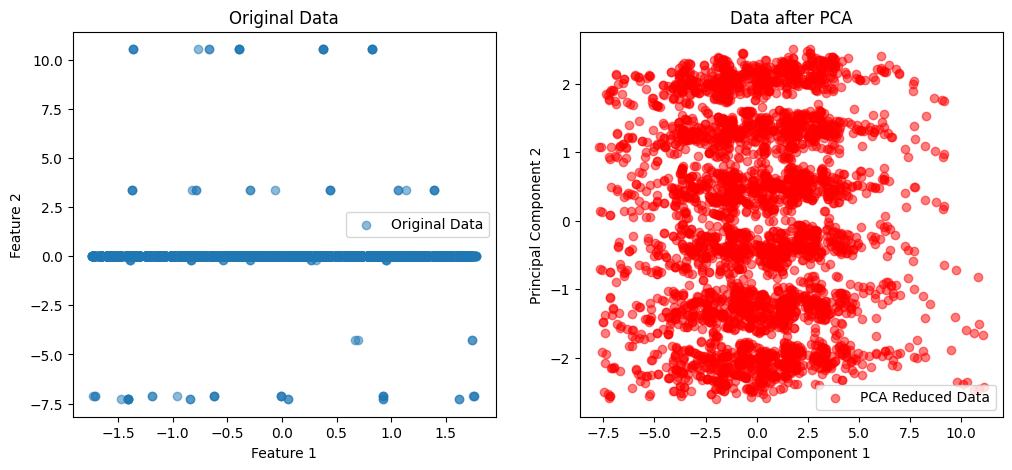

In [44]:
# Step 8: Visualize Before and After PCA
plt.figure(figsize=(12, 5))

# Original Data (First Two Features)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# PCA Reduced Data
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='red', label='PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')
plt.legend()

plt.show()
